𝐔𝐍𝐈𝐕𝐀𝐑𝐈𝐀𝐓𝐄 𝐀𝐍𝐀𝐋𝐘𝐒𝐈𝐒

In [1]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import scipy.stats as st
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


%matplotlib inline
print("Imported Sucessfully.")

Imported Sucessfully.


In [2]:
# Loading The Dataset

opfd=pd.read_csv("C:/Users/deeks/Downloads/onlinefraud.csv", encoding="latin1")
print("Online Fraud Detection Data Loaded Successfully.")

Online Fraud Detection Data Loaded Successfully.


In [3]:
# Univariate Analysis For Numerical

def outlier(x):
    q1 = np.nanpercentile(x, 25)
    q3 = np.nanpercentile(x, 75)
    iqr = q3 - q1
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr

    # Identification Non Outlier In Data
    non_outlier = []
    for num in x:
        if num >= lower_fence:
            if num <= upper_fence:
                non_outlier.append(num)
    lower_whisker = np.min(non_outlier)
    upper_whisker = np.max(non_outlier)

    # Identification Outlier In Data
    outlier = []
    for num in x:
        if num < lower_fence:
            outlier.append(num)
        if num > upper_fence:
            outlier.append(num)

    outlier_count = len(outlier)

    print('lower_whisker: {}'.format(lower_whisker))
    print('upper_whisker: {}'.format(upper_whisker))
    print('outlier counts: {}'.format(outlier_count))

1. step


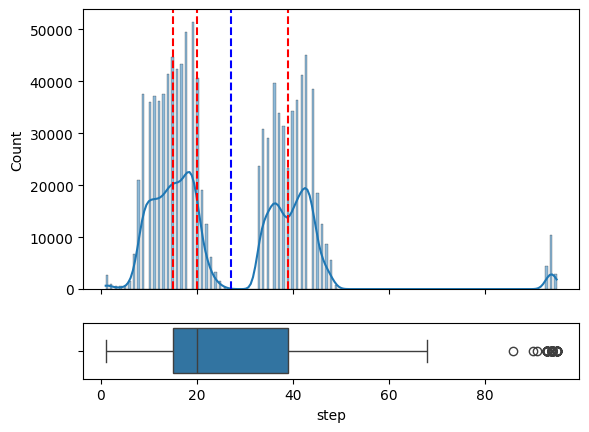

 
count    10000.000000
mean        27.063000
std         15.704697
min          1.000000
25%         15.000000
50%         20.000000
75%         39.000000
max         95.000000
Name: step, dtype: float64
 
lower_whisker: 1
upper_whisker: 68
outlier counts: 180
 
Data skewed with skew is 42.11361950786533
 
Data not normal
--------------------------------------------------
 
2. amount


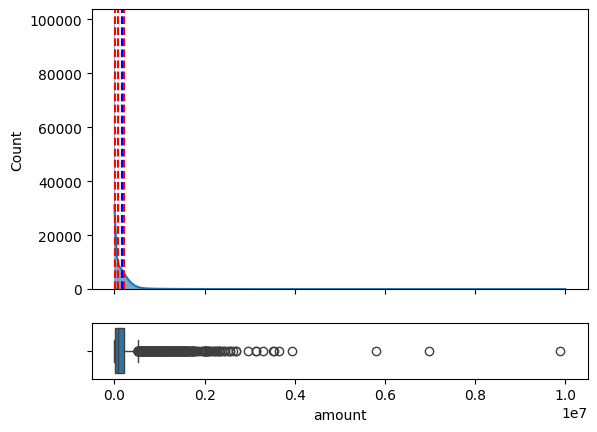

 
count    1.000000e+04
mean     1.602929e+05
std      2.885663e+05
min      1.980000e+00
25%      1.223277e+04
50%      7.741502e+04
75%      2.138050e+05
max      9.887819e+06
Name: amount, dtype: float64
 
lower_whisker: 1.98
upper_whisker: 515956.11
outlier counts: 506
 
Data skewed with skew is 104.8210805672688
 
Data not normal
--------------------------------------------------
 
3. oldbalanceOrg


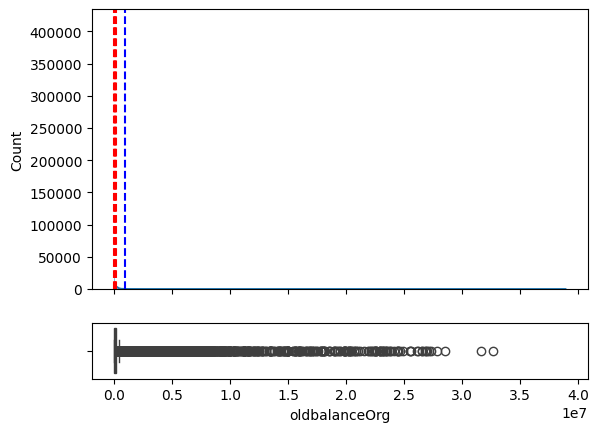

 
count    1.000000e+04
mean     8.887149e+05
std      2.994994e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.572300e+04
75%      1.406896e+05
max      3.270000e+07
Name: oldbalanceOrg, dtype: float64
 
lower_whisker: 0.0
upper_whisker: 351618.05
outlier counts: 1723
 
Data skewed with skew is 84.19109645573529
 
Data not normal
--------------------------------------------------
 
4. newbalanceOrig


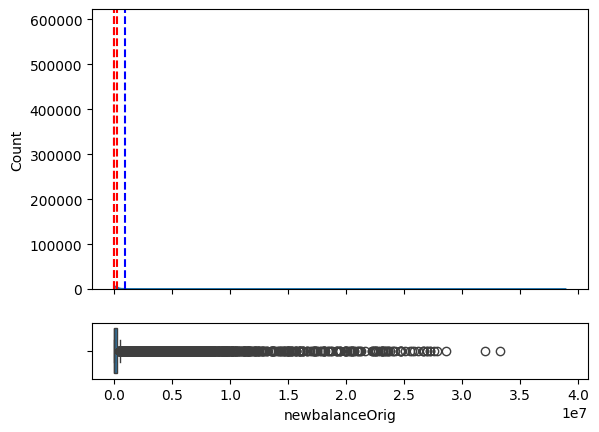

 
count    1.000000e+04
mean     9.072025e+05
std      3.030998e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.794714e+05
max      3.330000e+07
Name: newbalanceOrig, dtype: float64
 
lower_whisker: 0.0
upper_whisker: 448392.94
outlier counts: 1623
 
Data skewed with skew is 83.8684606627704
 
Data not normal
--------------------------------------------------
 
5. oldbalanceDest


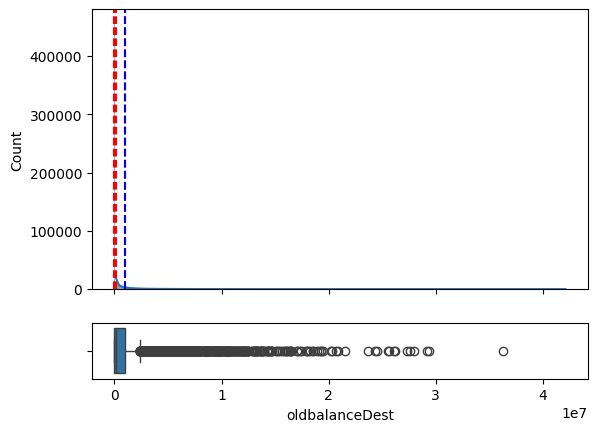

 
count    1.000000e+04
mean     1.006299e+06
std      2.342728e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.189236e+05
75%      9.496482e+05
max      3.630000e+07
Name: oldbalanceDest, dtype: float64
 
lower_whisker: 0.0
upper_whisker: 2373341.33
outlier counts: 1166
 
Data skewed with skew is 83.94787449553574
 
Data not normal
--------------------------------------------------
 
6. newbalanceDest


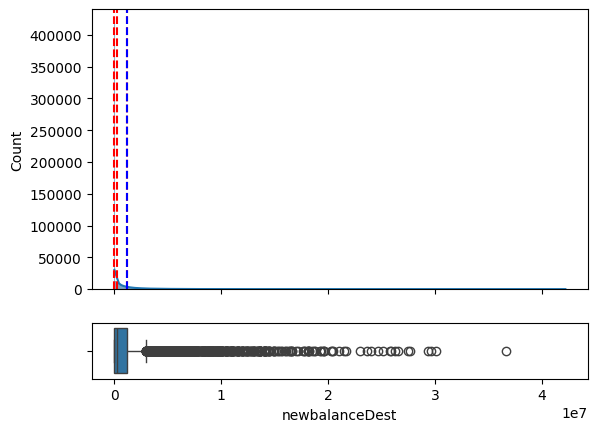

 
count    1.000000e+04
mean     1.142733e+06
std      2.471369e+06
min      0.000000e+00
25%      0.000000e+00
50%      2.183512e+05
75%      1.165503e+06
max      3.660000e+07
Name: newbalanceDest, dtype: float64
 
lower_whisker: 0.0
upper_whisker: 2912797.85
outlier counts: 1068
 
Data skewed with skew is 82.11437715064272
 
Data not normal
--------------------------------------------------
 
7. isFraud


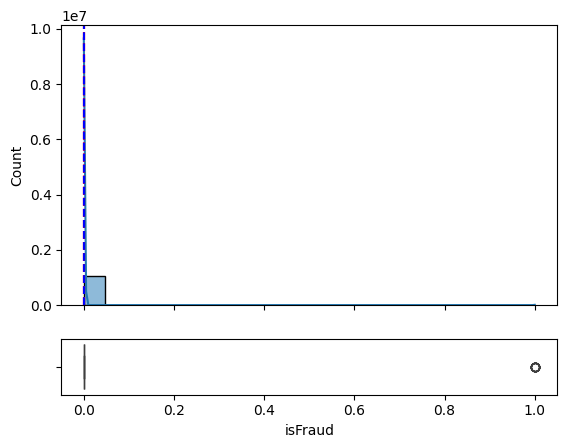

 
count    10000.00000
mean         0.00110
std          0.03315
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max          1.00000
Name: isFraud, dtype: float64
 
lower_whisker: 0
upper_whisker: 0
outlier counts: 11
 
Data skewed with skew is 143.58561876430647
 
Data not normal
--------------------------------------------------
 
8. isFlaggedFraud


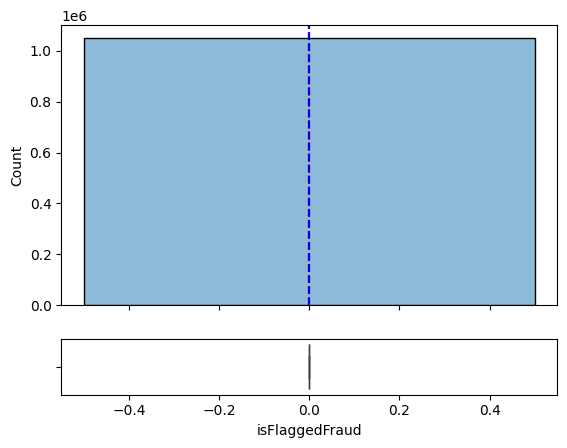

 
count    10000.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: isFlaggedFraud, dtype: float64
 
lower_whisker: 0
upper_whisker: 0
outlier counts: 0
 
Data not skewed
 
Data normal
--------------------------------------------------
 


In [4]:

opfd2 = resample(opfd,
              random_state=42,
              n_samples=10000,
              stratify=opfd['isFraud']).reset_index(drop=True)

opfd2_num = opfd2.select_dtypes('number').columns
norm_data = []
y=1
high_cor = []
low_cor = []


norm_data = []
for y,x in enumerate(opfd2_num,1):
    print(f'{y}. {x}')
    fig, ax = plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':[5,1]})
    sns.histplot(data=opfd, x=x, kde=True, ax=ax[0])
    ax[0].axvline(np.nanpercentile(opfd2[x], 25), c='red',linestyle='--')
    ax[0].axvline(np.nanpercentile(opfd2[x], 50), c='red',linestyle='--')
    ax[0].axvline(np.nanpercentile(opfd2[x], 75), c='red',linestyle='--')
    ax[0].axvline(np.mean(opfd2[x]), c='blue',linestyle='--')

    sns.boxplot(data=opfd2, x=x, ax=ax[1])
    ax[1].set_xlabel(f'{x}')
    plt.show()
    print(' ')
    print(opfd2[x].describe())
    print(' ')
    outlier(opfd2[x])
    print(' ')
    sk, pval = st.skewtest(opfd2[x])
    if pval < 0.05:
        print(f'Data skewed with skew is {sk}')
    else:
        print(f'Data not skewed')
    print(' ')
    norm, pval = st.normaltest(opfd2[x])
    if pval < 0.05:
        print(f'Data not normal')
    else:
        print(f'Data normal')
        norm_data.append(x)
    print('-'*50)
    print(' ')